In [1]:
import datasort_lab
import numpy as np
from CKA import linear_CKA
from analytics import compiled_list, subject_average

In [ ]:
# run cell to compute variance of all data set CKA

file_name = "transitions.csv"
subject_list = datasort_lab.subject_list(file_name)
var_list = []

for subject in subject_list:
    data_set = datasort_lab.data_sorter(file_name,subject)

    # data_sets
    compiled_byMonths = compiled_list(data_set) # list of monthly compiled matrices
    average_matrix = subject_average(compiled_byMonths) # average of all months
    shape = compiled_byMonths[0][1].shape
    compiled_byMonths = [x for x in compiled_byMonths if np.any(x[1] != np.zeros(shape))]

    CKA_list = []
    for date, matrix in compiled_byMonths:
        CKA_list.append(linear_CKA(average_matrix, matrix))
    var_list.append(np.var(CKA_list))

# returns a list of variance for all the data set
# index of element is equivalent to index of data set
# print(var_list)

# To sort variance and identify its data set source
# sorted_varlist = sorted(var_list)

# change number in [] to find index of intended variance
# var_list.index(sorted_varlist[-1])

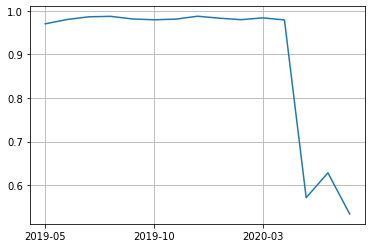

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

file_name = "transitions.csv"
subject_list = datasort_lab.subject_list(file_name)

# change number in [] to inspect intended data set
subject = subject_list[7]

data_set = datasort_lab.data_sorter(file_name,subject)
compiled_byMonths = compiled_list(data_set) # list of monthly compiled matrices
average_matrix = subject_average(compiled_byMonths)

# remove zero matrices
shape = compiled_byMonths[0][1].shape
compiled_byMonths = [x for x in compiled_byMonths if np.any(x[1] != np.zeros(shape))]

CKA_list = []
date_list = []
for i in range(len(compiled_byMonths)):
    date_list.append(compiled_byMonths[i][0])
    CKA_list.append(linear_CKA(average_matrix, compiled_byMonths[i][1]))

fig, ax = plt.subplots()
ax.plot(date_list,CKA_list)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.grid(True)
plt.show()